In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

#Print the class names
class_names = iris.target_names
print("Class Names:")
for i, name in enumerate(class_names):
    print(f"Class {i}: {name}")

# Get the feature names
feature_names = iris.feature_names

print(feature_names)

# Get the description of the dataset
description = iris.DESCR

# Print the description
print(description)

Class Names:
Class 0: setosa
Class 1: versicolor
Class 2: virginica
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.

The data set consists of samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
https://en.wikipedia.org/wiki/Iris_flower_data_set


In [137]:
# Determine the unique class labels
unique_classes = np.unique(y)

# Define how many samples to print per class
samples_per_class = 2

# Print samples from each class
for cls in unique_classes:
    print(f"Class {cls} - {iris.target_names[cls]}:")
    class_indices = np.where(y == cls)[0]
    for i, idx in enumerate(class_indices[:samples_per_class]):
        print(f"Sample {i + 1}:")
        print("Features:", X[idx])
        print("Label:", y[idx])
        print()

Class 0 - setosa:
Sample 1:
Features: [5.1 3.5 1.4 0.2]
Label: 0

Sample 2:
Features: [4.9 3.  1.4 0.2]
Label: 0

Class 1 - versicolor:
Sample 1:
Features: [7.  3.2 4.7 1.4]
Label: 1

Sample 2:
Features: [6.4 3.2 4.5 1.5]
Label: 1

Class 2 - virginica:
Sample 1:
Features: [6.3 3.3 6.  2.5]
Label: 2

Sample 2:
Features: [5.8 2.7 5.1 1.9]
Label: 2



In [138]:

print(X.shape)
print(y.shape)

(150, 4)
(150,)


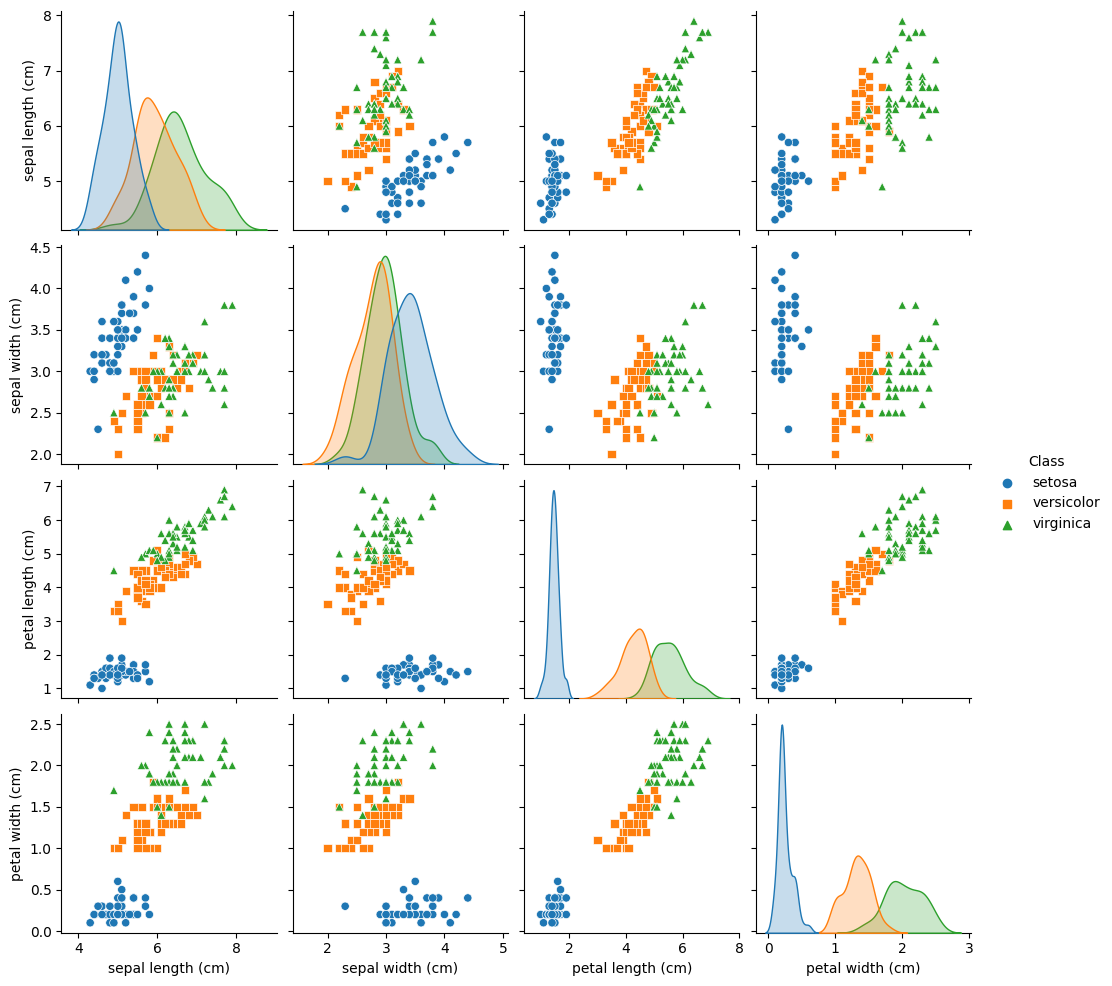

In [94]:
# Convert the dataset to a pandas DataFrame for easy visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['Class'] = iris.target_names[y]

# Plot pair plots with class colors
sns.pairplot(df, hue='Class', markers=['o', 's', '^'])
plt.show()

In [139]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape  )
print(X_test.shape,  y_test.shape )

(120, 4) (120,)
(30, 4) (30,)


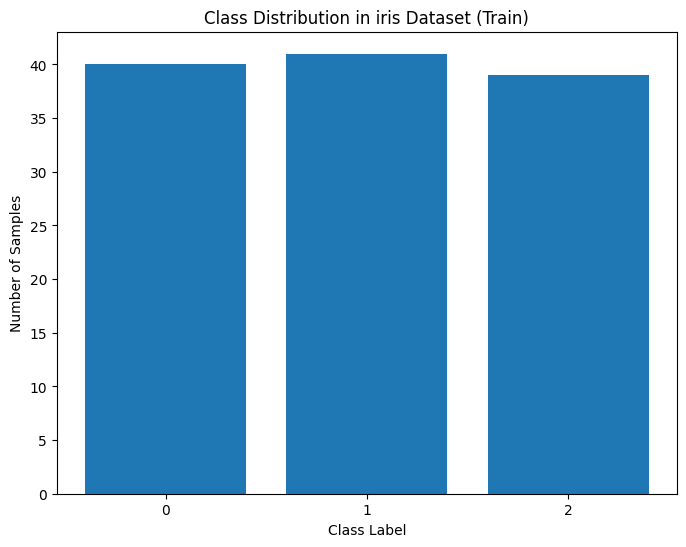

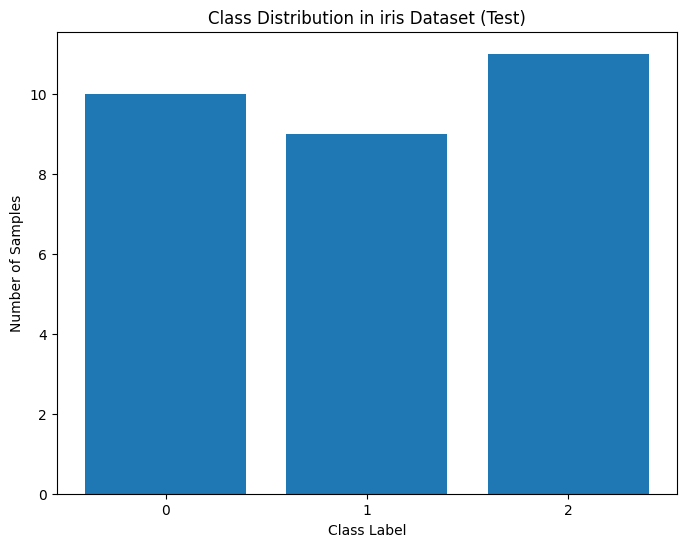

In [140]:
# Count the occurrences of each class label
class_counts_train = np.bincount(y_train)


# Generate class labels from 0 to 2
class_labels = np.arange(3)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts_train, tick_label=class_labels, align='center')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in iris Dataset (Train)')
plt.show()




# Count the occurrences of each class label
class_counts_test = np.bincount(y_test)

# Generate class labels from 0 to 2
class_labels = np.arange(3)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts_test, tick_label=class_labels, align='center')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in iris Dataset (Test)')
plt.show()


In [141]:

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(y_train.shape, y_test.shape  )


# One-hot encode the target labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train_cat.shape, y_test_cat.shape  )

(120,) (30,)
(120, 3) (30, 3)


In [142]:
print(y_train[1], y_train_cat[1]  )
print(y_train[99], y_train_cat[99]  )
print(y_train[101], y_train_cat[101]  )

0 [1. 0. 0.]
1 [0. 1. 0.]
2 [0. 0. 1.]


In [143]:
# Build the neural network model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,))) # since we have four features, input shape is  4
model.add(Dense(3, activation='softmax'))# since we have three clases output size is  3

# Visualize the model architecture
# Print the model summary
model.summary()



Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
14/14 [==============================] - 0s 10ms/step - loss: 1.4770 - accuracy: 0.1852 - val_loss: 1.3287 - val_accuracy: 0.0833
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 1.4499 - accuracy: 0.1852 - val_loss: 1.3168 - val_accuracy: 0.0833
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 1.4243 - accuracy: 0.1944 - val_loss: 1.3050 - val_accuracy: 0.0833
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 1.3981 - accuracy: 0.1944 - val_loss: 1.2936 - val_accuracy: 0.0833
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 1.3738 - accuracy: 0.1944 - val_loss: 1.2828 - val_accuracy: 0.0833
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 1.3506 - accuracy: 0.1944 - val_loss: 1.2724 - val_accuracy: 0.1667
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 1.3282 - accuracy: 0.2037 - val_loss: 1.2621 - val_accuracy: 0.1667
Epoch 8/50
14/14 [=

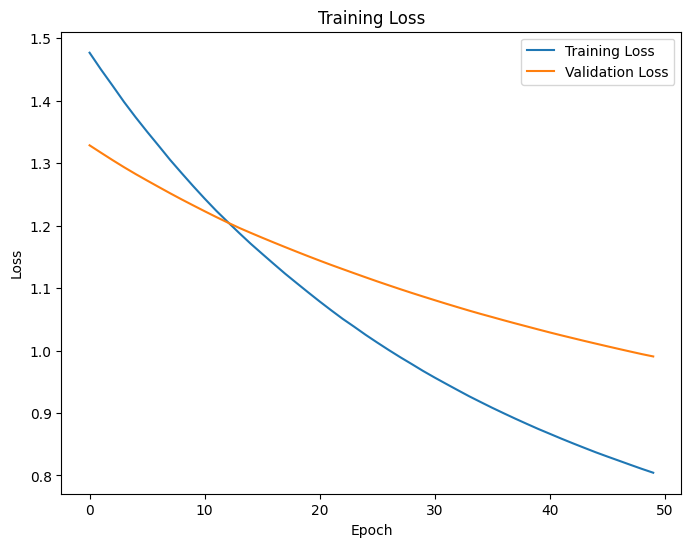

1/1 [==============================] - 0s 2ms/step - loss: 0.7888 - accuracy: 0.8667
Test loss: 0.7888, Test accuracy: 0.8667


In [144]:
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import SGD
# Compile the model


learning_rate = 0.001  # Example learning rate
# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model and store the training history
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=8, validation_split=0.1)

# Plot training loss and accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()



# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)
Class Labels in Training Set: [0 1 2 3 4 5 6 7 8 9]
Class Labels in Test Set: [0 1 2 3 4 5 6 7 8 9]


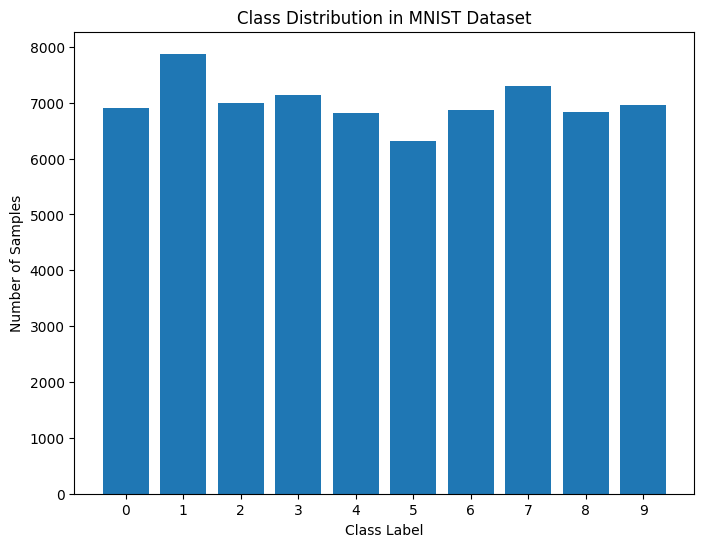

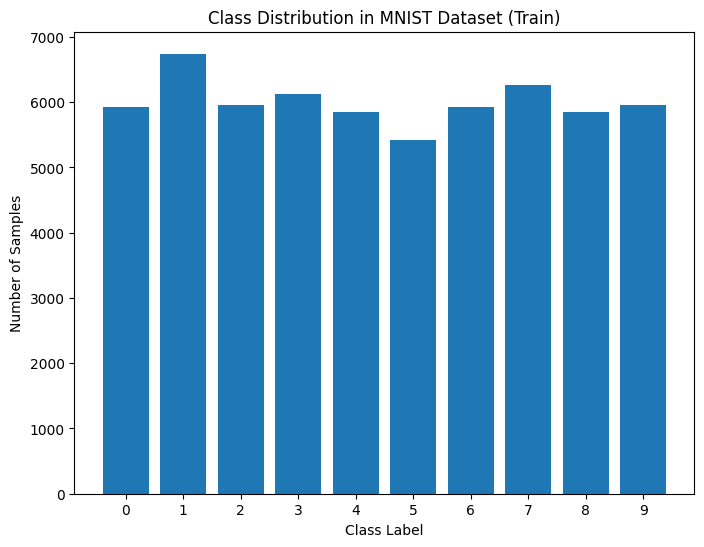

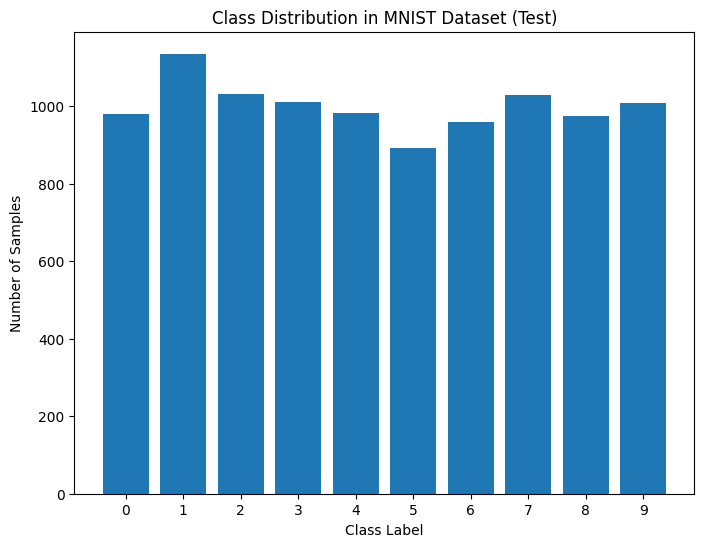

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape,  X_test.shape )
print(y_train.shape,  y_test.shape )

# Print all unique class labels in training set
unique_labels_train = np.unique(y_train)
print("Class Labels in Training Set:", unique_labels_train)

# Print all unique class labels in test set
unique_labels_test = np.unique(y_test)
print("Class Labels in Test Set:", unique_labels_test)



# Concatenate train and test labels to get the entire dataset
y_all = np.concatenate([y_train, y_test])

# Count the occurrences of each class label
class_counts = np.bincount(y_all)

# Generate class labels from 0 to 9
class_labels = np.arange(10)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, tick_label=class_labels, align='center')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset')
plt.show()


# Count the occurrences of each class label
class_counts_train = np.bincount(y_train)

# Generate class labels from 0 to 9
class_labels = np.arange(10)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts_train, tick_label=class_labels, align='center')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset (Train)')
plt.show()




# Count the occurrences of each class label
class_counts_test = np.bincount(y_test)

# Generate class labels from 0 to 9
class_labels = np.arange(10)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts_test, tick_label=class_labels, align='center')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset (Test)')
plt.show()



In [146]:
# Flatten the images into a 1D array
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print(X_train.shape,  X_test.shape )
print(y_train.shape,  y_test.shape )


# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


(60000, 784) (10000, 784)
(60000,) (10000,)


In [149]:
# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Visualize the model architecture
# Print the model summary
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.2559 - accuracy: 0.9216 - val_loss: 0.1470 - val_accuracy: 0.9567
Epoch 2/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.1106 - accuracy: 0.9663 - val_loss: 0.0961 - val_accuracy: 0.9705
Epoch 3/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0792 - accuracy: 0.9759 - val_loss: 0.0821 - val_accuracy: 0.9753
Epoch 4/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0602 - accuracy: 0.9813 - val_loss: 0.0838 - val_accuracy: 0.9778
Epoch 5/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0787 - val_accuracy: 0.9782
Epoch 6/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0388 - accuracy: 0.9870 - val_loss: 0.0847 - val_accuracy: 0.9775
Epoch 7/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0878 - val_accuracy:

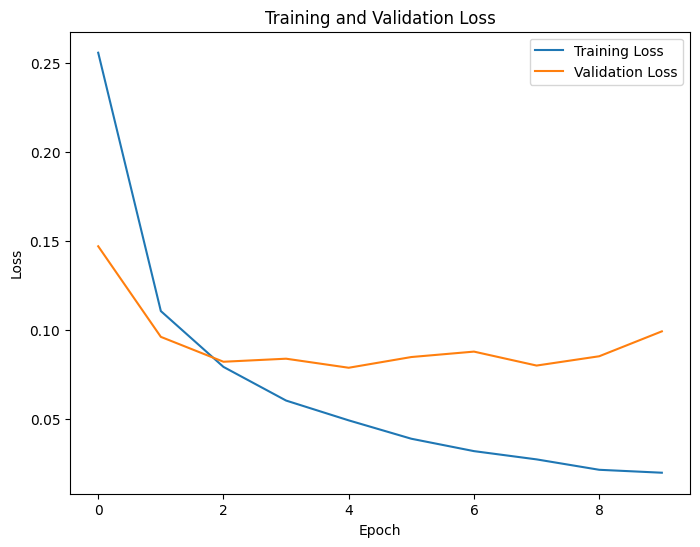

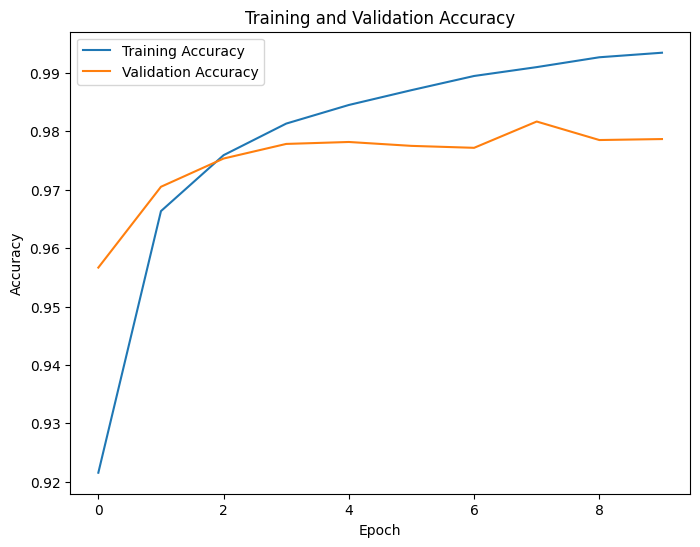

In [151]:
from tensorflow.keras.optimizers import SGD
# Compile the model
# Define the learning rate
learning_rate = 0.01  # Example learning rate

# Create an optimizer with the specified learning rate
optimizer = SGD(learning_rate=learning_rate,momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

# Plot training loss and accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

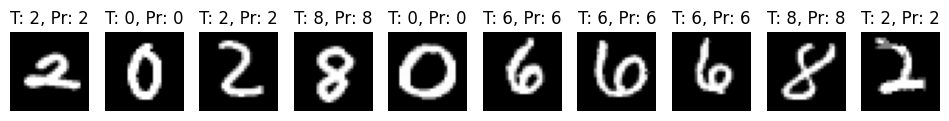

In [152]:
# Select random examples from the test set
num_examples = 10
random_indices = np.random.randint(0, len(X_test), num_examples)
X_examples = X_test[random_indices]
y_true = y_test[random_indices]

# Make predictions for the selected examples
y_pred = model.predict(X_examples)
y_pred_labels = np.argmax(y_pred, axis=1)

# Visualize the images and their true/predicted labels
plt.figure(figsize=(12, 6))
for i in range(num_examples):
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_examples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"T: {np.argmax(y_true[i])}, Pr: {y_pred_labels[i]}")
plt.show()

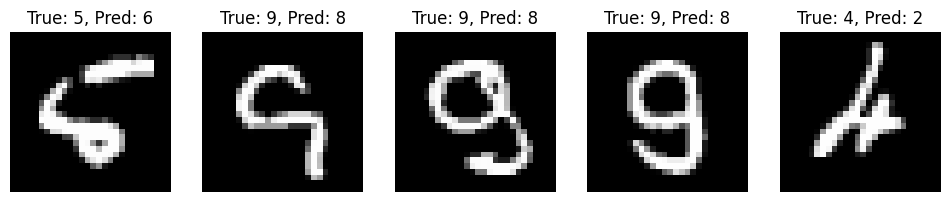

In [153]:
# Find the indices of wrong predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
wrong_indices = np.where(y_pred_labels != y_true_labels)[0]

# Visualize a few wrong predictions
num_examples = min(5, len(wrong_indices))
plt.figure(figsize=(12, 6))
for i in range(num_examples):
    index = wrong_indices[i]
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_true_labels[index]}, Pred: {y_pred_labels[index]}")
plt.show()

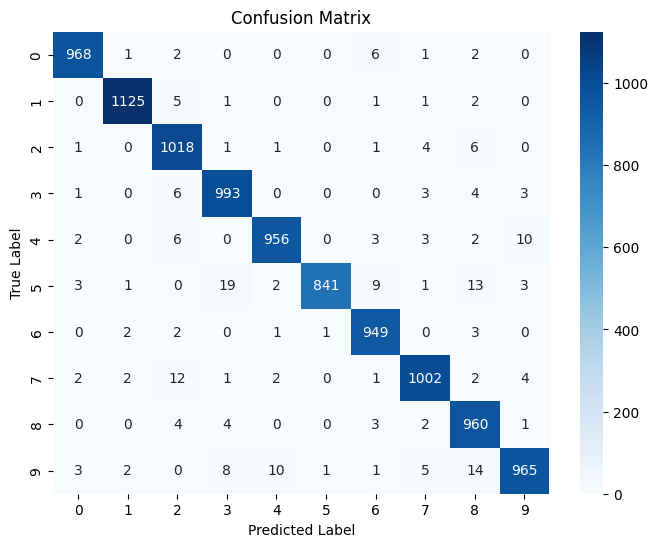

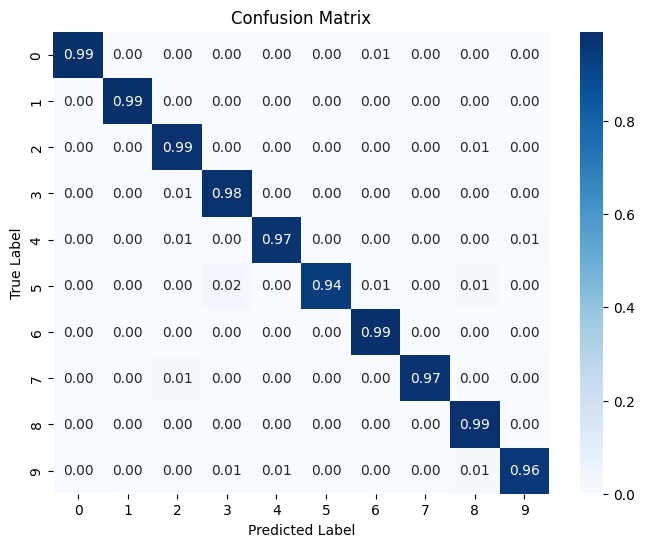

In [154]:
from sklearn.metrics import confusion_matrix
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Normalize the confusion matrix to get probabilities
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]



# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10) + 0.5, labels=[str(i) for i in range(10)])
plt.yticks(np.arange(10) + 0.5, labels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.show()


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True,  fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10) + 0.5, labels=[str(i) for i in range(10)])
plt.yticks(np.arange(10) + 0.5, labels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.show()